In [1]:
Basic EDA for the CityLearnChallenge2022 on AiCrowd

SyntaxError: invalid syntax (3659330747.py, line 1)

In [3]:
import os
import math

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
# Print files in data folder. Change base path to your data folder
base_data = "../data/citylearn_challenge_2022_phase_1/"

if not os.path.exists(base_data):
    raise FileNotFoundError("You should probably change the base_data variable to the folder where your CityLearn data is")

In [5]:
for file_name in os.listdir(base_data):
    print(file_name)

Building_1.csv
Building_2.csv
Building_3.csv
Building_4.csv
Building_5.csv
carbon_intensity.csv
pricing.csv
schema.json
weather.csv


In [6]:
# Explore buildings first
buildings = [pd.read_csv(f"{base_data}Building_{i}.csv") for i in range(1, 6)]

buildings[0].head()

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.275800,0,0,0,0.0
1,8.0,1.0,1.0,0,NaN,NaN,NaN,0.851167,0,0,0,0.0
2,8.0,2.0,1.0,0,NaN,NaN,NaN,0.834600,0,0,0,0.0
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.838167,0,0,0,0.0
4,8.0,4.0,1.0,0,NaN,NaN,NaN,1.478433,0,0,0,0.0


In [181]:
buildings[1].head()

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.188750,0,0,0,0.0
1,8.0,1.0,1.0,0,NaN,NaN,NaN,1.370667,0,0,0,0.0
2,8.0,2.0,1.0,0,NaN,NaN,NaN,1.101250,0,0,0,0.0
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.543217,0,0,0,0.0
4,8.0,4.0,1.0,0,NaN,NaN,NaN,0.542833,0,0,0,0.0


In [182]:
# EDA for building 1
print(f"Building 1 has {len(buildings[0])} rows of data, which is one row for each hour in a year \n")
print("Columns:")
print(buildings[0].dtypes)

Building 1 has 8760 rows of data, which is one row for each hour in a year 

Columns:
Month                                            float64
Hour                                             float64
Day Type                                         float64
Daylight Savings Status                            int64
Indoor Temperature [C]                           float64
Average Unmet Cooling Setpoint Difference [C]    float64
Indoor Relative Humidity [%]                     float64
Equipment Electric Power [kWh]                   float64
DHW Heating [kWh]                                  int64
Cooling Load [kWh]                                 int64
Heating Load [kWh]                                 int64
Solar Generation [W/kW]                          float64
dtype: object


In [183]:
# EDA for building 1 --> Different values in columns
# Nan gets converted to -78, so {-78} means the column is only nan
building = buildings[0]
for column in building.columns:
    temp = [x if not np.isnan(x) else -78 for x in building[column]]
    if len(list(set(temp))) > 15:
        print(f"{column} to set --> More than 15 different values between {min(temp)} and {max(temp)}")
    else:
        print(f"{column} to set --> {set(temp)}")


Month to set --> {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}
Hour to set --> More than 15 different values between 1.0 and 24.0
Day Type to set --> {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
Daylight Savings Status to set --> {0}
Indoor Temperature [C] to set --> {-78}
Average Unmet Cooling Setpoint Difference [C] to set --> {-78}
Indoor Relative Humidity [%] to set --> {-78}
Equipment Electric Power [kWh] to set --> More than 15 different values between 0.0569999999999999 and 7.987483317057293
DHW Heating [kWh] to set --> {0}
Cooling Load [kWh] to set --> {0}
Heating Load [kWh] to set --> {0}
Solar Generation [W/kW] to set --> More than 15 different values between 0.0 and 976.25


In [184]:
"""
So actual information:
    - Month, hour, day of week (and day of month probably, since rows are ordered for months)
    - Equipment Electric Power
    - Solar Generation
"""
pass

In [185]:
def add_day_of_month(df):
    """
    Little bit custom, but should work
    Hard to do otherwise I think without hardcoding number of days in month
    """
    index, day = 0, 1
    day_of_month = []
    
    cur_month = df["Month"][0]
    cur_weekday = df["Day Type"][0]
    
    while index < len(df):
        if df["Month"][index] == cur_month:
            if df["Day Type"][index] == cur_weekday:
                day_of_month.append(day)
            else:
                day += 1
                day_of_month.append(day)
                cur_weekday = df["Day Type"][index]
            index += 1
        else:
            cur_month = df["Month"][index]
            day = 0
        

    df["Day"] = day_of_month
    return df

# Add day of month to all building df's
buildings = [add_day_of_month(x) for x in buildings]

In [186]:
# Concatenate buildings to new dataframe, saves lot of work probably
for i in range(1, 6):
    buildings[i-1]["Building"] = [i]*len(buildings[i-1])

# Concatenate with building column (1-5) that specifies the original building
df_buildings = pd.concat(buildings, axis=0, join="inner").reset_index()

# Drop all columns without information (for now)
df_buildings = df_buildings.drop(["Daylight Savings Status", 
                                  "Indoor Temperature [C]",
                                  "Average Unmet Cooling Setpoint Difference [C]",
                                  "Indoor Relative Humidity [%]",
                                  "DHW Heating [kWh]",
                                  "Cooling Load [kWh]",
                                  "Heating Load [kWh]"], axis=1, inplace=False)
df_buildings.head()

,index,Month,Hour,Day Type,Equipment Electric Power [kWh],Solar Generation [W/kW],Day,Building
0,0,7.0,24.0,7.0,2.275800,0.0,1,1
1,1,8.0,1.0,1.0,0.851167,0.0,1,1
2,2,8.0,2.0,1.0,0.834600,0.0,1,1
3,3,8.0,3.0,1.0,0.838167,0.0,1,1
4,4,8.0,4.0,1.0,1.478433,0.0,1,1


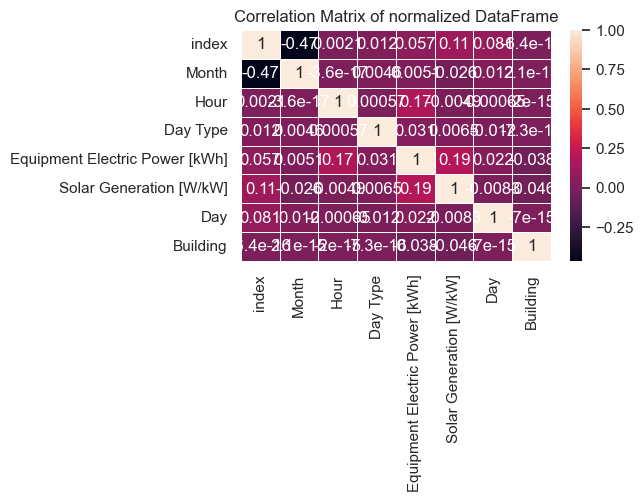

In [187]:
# Plotting the information available
# Many visualizations are usefull in the process. Here, some basic ones are used
sn.set_theme()

# Draw a correlation matrix (how much variables correlate with each other)
f, ax = plt.subplots(figsize=(5, 3))
sn.heatmap(df_buildings.corr(), annot=True, linewidths=.5, ax=ax)
plt.title("Correlation Matrix of normalized DataFrame")
plt.show()

# Note how little correlation there is between month and EEP? Dont know why, but we should figure that out

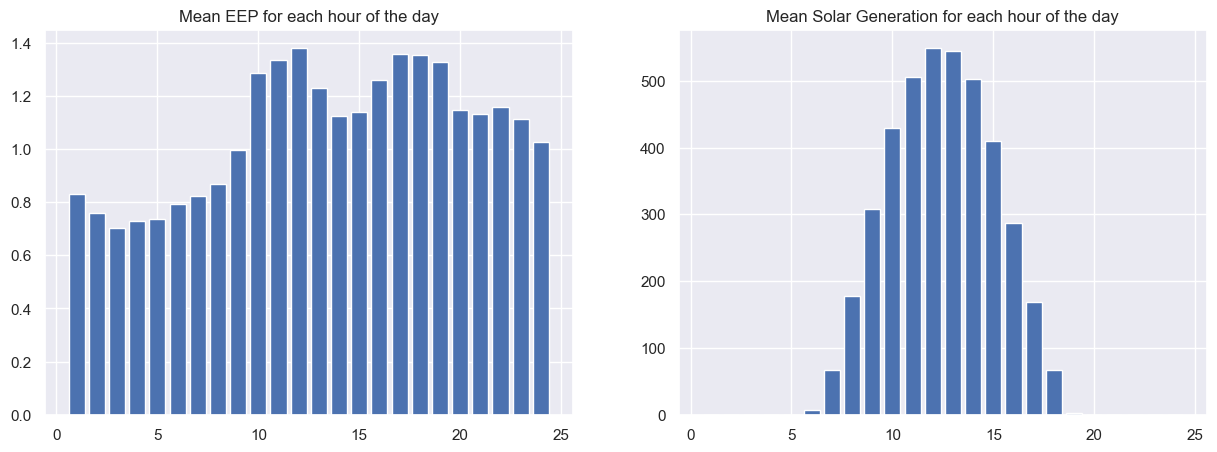

In [188]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

hours = {int(i): [] for i in range(1, 25)}
for i in range(len(df_buildings)):
    hours[int(df_buildings["Hour"][i])].append(df_buildings["Equipment Electric Power [kWh]"][i])
    
axs[0].bar(hours.keys(), [np.mean(x) for x in hours.values()])
axs[0].set_title('Mean EEP for each hour of the day')


hours = {int(i): [] for i in range(1, 25)}
for i in range(len(df_buildings)):
    hours[int(df_buildings["Hour"][i])].append(df_buildings["Solar Generation [W/kW]"][i])
    
axs[1].bar(hours.keys(), [np.mean(x) for x in hours.values()])
axs[1].set_title("Mean Solar Generation for each hour of the day")


plt.show()

In [189]:
# Load the other dataframes
df_weather = pd.read_csv(f"{base_data}weather.csv")
df_pricing = pd.read_csv(f"{base_data}pricing.csv")
df_carbon = pd.read_csv(f"{base_data}carbon_intensity.csv")

In [190]:
# EDA on weather data
df_weather.head()

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


In [191]:
# EDA on pricing data
df_pricing.head()

,Electricity Pricing [$],6h Prediction Electricity Pricing [$],12h Prediction Electricity Pricing [$],24h Prediction Electricity Pricing [$]
0,0.22,0.22,0.22,0.22
1,0.22,0.22,0.22,0.22
2,0.22,0.22,0.22,0.22
3,0.22,0.22,0.22,0.22
4,0.22,0.22,0.54,0.22


In [192]:
# EDA on carbon data
# Straightforward, as you can see
df_carbon.head()

,kg_CO2/kWh
0,0.170724
1,0.157319
2,0.154503
3,0.150945
4,0.151820


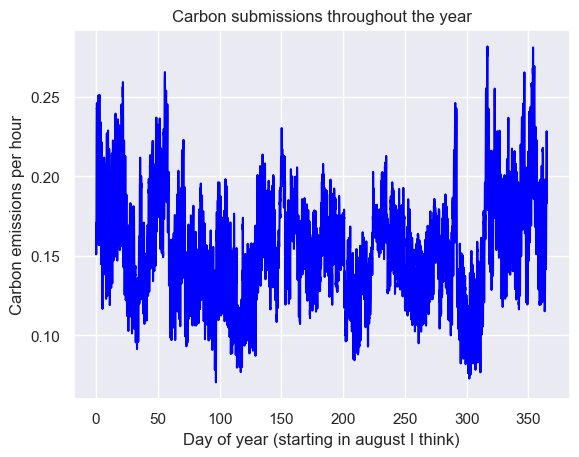

In [194]:
plt.plot(list(map(lambda l: l/24, range(len(df_carbon)))), df_carbon["kg_CO2/kWh"], color="blue")
plt.title("Carbon submissions throughout the year")
plt.xlabel("Day of year (starting in august I think)")
plt.ylabel("Carbon emissions per hour")
plt.show()

Conclusion
- The 'episode' for this RL problem is one year, with each timestep 1 hour
- The environment running is the CityLearn Gym environment, which needs building information to run
- The CityLearn environment is much larger, but this competition focuses on specific metrics
